In [1]:
import pandas as pd
import numpy as np
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
import re
import statsmodels.api as sm

In [2]:
from sklearn import linear_model
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
df = pd.DataFrame(boston.data,boston.target)

In [5]:
y = pd.DataFrame(boston.target)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<Figure size 504x3600 with 0 Axes>

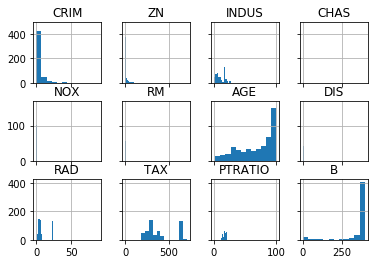

In [10]:
plt.figure(figsize=(7,50))
fig, ax = plt.subplots(3, 4, sharex='col', sharey='row')

m=0
for i in range(3):
    for j in range(4):

        df.hist(column = df.columns[m], bins = 12, ax=ax[i,j], figsize=(20, 18))
        m+=1

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <a list of 10 Patch objects>)

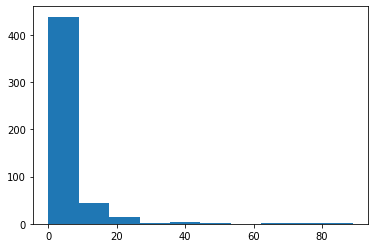

In [11]:
plt.hist(df.CRIM)

(array([372.,  12.,  48.,  16.,  13.,   6.,   4.,   6.,  19.,  10.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <a list of 10 Patch objects>)

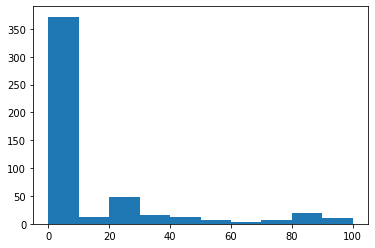

In [12]:
plt.hist(df.ZN)

(array([ 56.,  95.,  99.,  44.,  20.,   3., 132.,  45.,   0.,  12.]),
 array([ 0.46 ,  3.188,  5.916,  8.644, 11.372, 14.1  , 16.828, 19.556,
        22.284, 25.012, 27.74 ]),
 <a list of 10 Patch objects>)

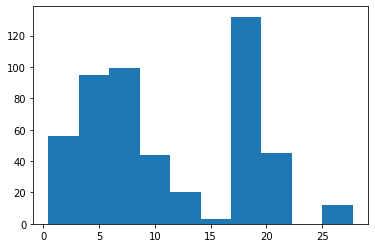

In [13]:
plt.hist(df.INDUS)

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

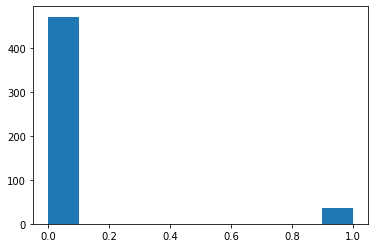

In [14]:
plt.hist(df.CHAS)

(array([75., 80., 89., 60., 78., 30., 57., 21.,  0., 16.]),
 array([0.385 , 0.4336, 0.4822, 0.5308, 0.5794, 0.628 , 0.6766, 0.7252,
        0.7738, 0.8224, 0.871 ]),
 <a list of 10 Patch objects>)

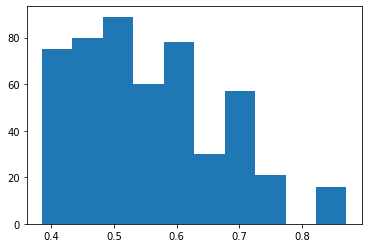

In [15]:
plt.hist(df.NOX)

(array([  2.,   4.,  14.,  45., 177., 151.,  69.,  22.,  13.,   9.]),
 array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
        7.7362, 8.2581, 8.78  ]),
 <a list of 10 Patch objects>)

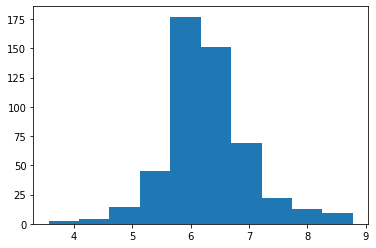

In [16]:
plt.hist(df.RM)

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <a list of 10 Patch objects>)

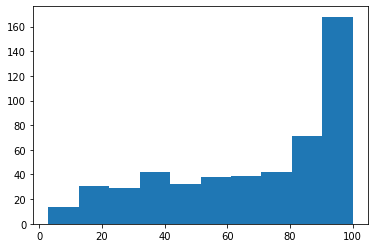

In [17]:
plt.hist(df.AGE)

(array([150., 111.,  81.,  61.,  46.,  26.,  19.,   7.,   4.,   1.]),
 array([ 1.1296 ,  2.22929,  3.32898,  4.42867,  5.52836,  6.62805,
         7.72774,  8.82743,  9.92712, 11.02681, 12.1265 ]),
 <a list of 10 Patch objects>)

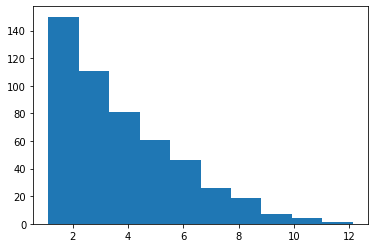

In [18]:
plt.hist(df.DIS)

(array([ 82., 225.,  43.,  24.,   0.,   0.,   0.,   0.,   0., 132.]),
 array([ 1. ,  3.3,  5.6,  7.9, 10.2, 12.5, 14.8, 17.1, 19.4, 21.7, 24. ]),
 <a list of 10 Patch objects>)

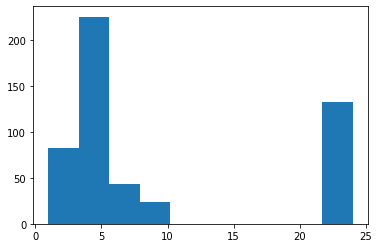

In [19]:
plt.hist(df.RAD)

(array([ 54., 100., 108.,  32.,  74.,   1.,   0.,   0.,   0., 137.]),
 array([187. , 239.4, 291.8, 344.2, 396.6, 449. , 501.4, 553.8, 606.2,
        658.6, 711. ]),
 <a list of 10 Patch objects>)

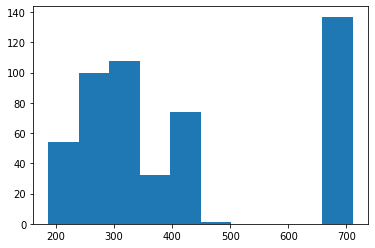

In [20]:
plt.hist(df.TAX)

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <a list of 10 Patch objects>)

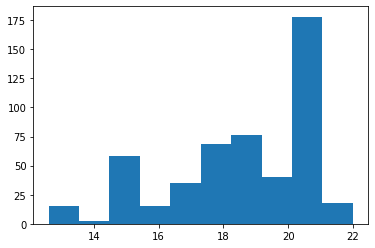

In [21]:
plt.hist(df.PTRATIO)

(array([ 18.,   6.,  10.,   2.,   3.,   3.,   7.,  11.,  33., 413.]),
 array([3.20000e-01, 3.99780e+01, 7.96360e+01, 1.19294e+02, 1.58952e+02,
        1.98610e+02, 2.38268e+02, 2.77926e+02, 3.17584e+02, 3.57242e+02,
        3.96900e+02]),
 <a list of 10 Patch objects>)

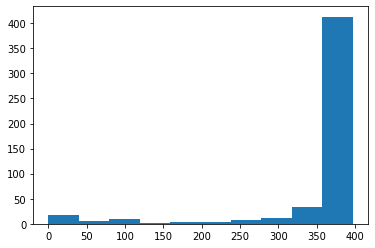

In [22]:
plt.hist(df.B)

(array([ 75., 108.,  99.,  84.,  64.,  30.,  21.,  16.,   4.,   5.]),
 array([ 1.73 ,  5.354,  8.978, 12.602, 16.226, 19.85 , 23.474, 27.098,
        30.722, 34.346, 37.97 ]),
 <a list of 10 Patch objects>)

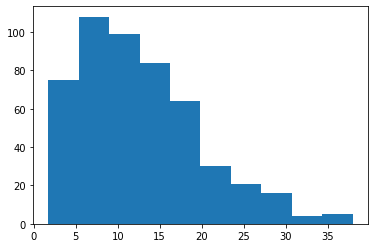

In [23]:
plt.hist(df.LSTAT)

In [24]:
df["MEDV"] = boston.target

In [25]:
df.shape

(506, 14)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

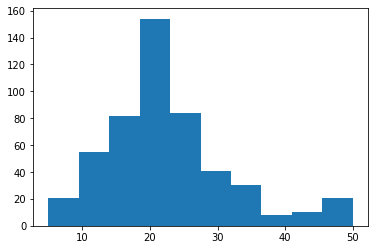

In [26]:
plt.hist(df.MEDV)

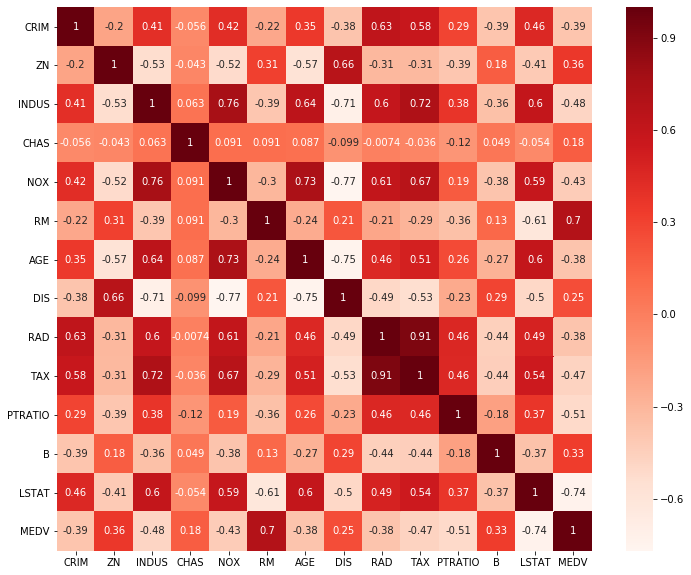

In [27]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [29]:
y = pd.DataFrame(df["MEDV"])
X = df[['CRIM','ZN','INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
lm = linear_model.LinearRegression()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X.shape

(506, 12)

In [32]:
y.shape

(506, 1)

In [33]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred = lm.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
import math
import statsmodels.api as sm

Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Yhat')

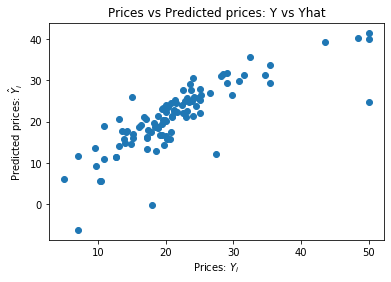

In [36]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Y vs Yhat")

In [37]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-1.12170610e-01  1.88685289e-02 -2.57599824e-02  3.03410105e+00
  -1.82463047e+01  4.53438165e+00 -6.14499588e-03 -1.42341876e+00
   1.11447195e-01 -9.44170693e-01  1.26156875e-02 -5.04829871e-01]]
Mean squared error: 25.40
Root Mean squared error: 5.04
Variance score: 0.65


In [38]:
from sklearn.linear_model import RidgeCV


In [39]:
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Yhat')

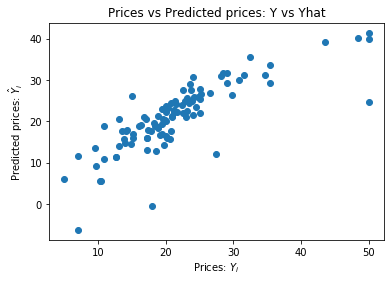

In [40]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Y vs Yhat")

In [41]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-1.12170610e-01  1.88685289e-02 -2.57599824e-02  3.03410105e+00
  -1.82463047e+01  4.53438165e+00 -6.14499588e-03 -1.42341876e+00
   1.11447195e-01 -9.44170693e-01  1.26156875e-02 -5.04829871e-01]]
Mean squared error: 25.41
Root Mean squared error: 5.04
Variance score: 0.65


In [42]:
y_trans = np.log1p(y)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, random_state=0)


In [44]:
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [45]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-1.12170610e-01  1.88685289e-02 -2.57599824e-02  3.03410105e+00
  -1.82463047e+01  4.53438165e+00 -6.14499588e-03 -1.42341876e+00
   1.11447195e-01 -9.44170693e-01  1.26156875e-02 -5.04829871e-01]]
Mean squared error: 0.05
Root Mean squared error: 0.22
Variance score: 0.66


In [46]:
X_trans = np.log1p(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, random_state=0)

In [48]:
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [49]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-1.12170610e-01  1.88685289e-02 -2.57599824e-02  3.03410105e+00
  -1.82463047e+01  4.53438165e+00 -6.14499588e-03 -1.42341876e+00
   1.11447195e-01 -9.44170693e-01  1.26156875e-02 -5.04829871e-01]]
Mean squared error: 0.04
Root Mean squared error: 0.21
Variance score: 0.68


Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Yhat')

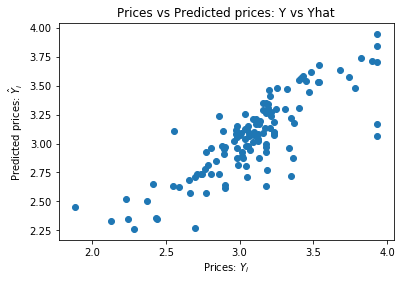

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Y vs Yhat")

In [51]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred = lm.predict(X_test)

In [53]:
# The coefficients
print('Coefficients: \n', lm.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [[-0.15225671 -0.01472516 -0.05356059  0.14250146 -0.64809455  0.4671381
   0.0213171  -0.19803889  0.11717196 -0.67676962  0.03763475 -0.40698013]]
Mean squared error: 0.04
Root Mean squared error: 0.21
Variance score: 0.68


In [54]:
from sklearn.linear_model import Lasso

In [55]:
lasso = Lasso()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, random_state=0)

In [57]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
18.5,0.175070,3.135494,1.925707,0.000000,0.358374,1.887827,4.265493,2.192201,2.079442,3.000720,5.966480,2.968361
19.6,0.098288,3.258097,1.813195,0.000000,0.373630,1.935427,3.875359,2.070905,2.197225,3.030134,5.986201,2.324347
33.2,0.099565,3.713572,2.002830,0.693147,0.369492,2.112272,3.912023,1.755649,1.609438,2.923162,5.966788,1.953028
13.1,2.273851,0.000000,2.949688,0.000000,0.526502,2.011029,4.603168,1.002725,3.218876,3.054001,5.973759,2.897016
7.5,2.470994,0.000000,2.949688,0.000000,0.518198,2.051813,4.519612,1.036560,3.218876,3.054001,3.116622,3.288029


In [58]:
y_train.head()

,MEDV
18.5,2.970414
19.6,3.025291
33.2,3.532226
13.1,2.646175
7.5,2.140066


In [59]:
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)

In [60]:
y_preddf = pd.DataFrame(y_pred)

In [61]:
y_preddf.head()

,0
0,3.087219
1,3.087219
2,3.087219
3,3.087219
4,3.087219


In [62]:
# The coefficients
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print(f"Mean squared error:{mean_squared_error(y_test, y_pred): .2f}")
print(f"Root Mean squared error: {math.sqrt(mean_squared_error(y_test, y_pred)) :.2f}")
# Explained variance score: 1 is perfect prediction
print(f'Variance score: {r2_score(y_test, y_pred):.2f}')

Coefficients: 
 [-0.  0. -0.  0. -0.  0. -0.  0. -0. -0.  0. -0.]
Mean squared error: 0.14
Root Mean squared error: 0.37
Variance score: -0.00


Text(0.5, 1.0, 'Prices vs Predicted prices: Y vs Yhat')

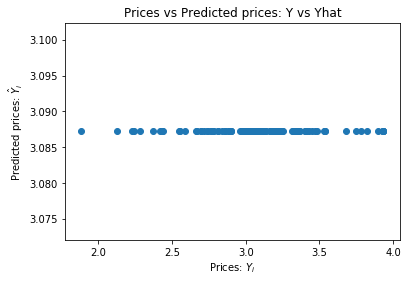

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: Y vs Yhat")

In [64]:
lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [65]:
print ("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.0
test score:  -0.00036597583533803935
number of features used:  0


In [66]:
import pickle
pickle.dump(lm, open("bostonhouseprice.pkl", "wb"))